In [9]:
import numpy as np

from matplotlib import pyplot as plt

from taylor_approximation import*
from make_param_grid import*

## Example Notebook for Taylor Series Emu

## Define Function To Emulate

In [10]:
# Define function we want to "emulate"
xs = np.arange(-8,8,0.1)

def func(a, b, c):
    return np.array([np.exp(a) * np.sin(xs) + b, a * np.tanh(c*xs)])

output_shape = func(0, 0, 0).shape

## Set up Finite Difference Grid

In [11]:
order = 4
Npoints = 2*order + 1

params_center = np.array([1, 2, 3]); Nparams = len(params_center)
params_dxs    = np.array([0.1, 0.05, 0.2])

Coords, Inds, center_ii = make_param_grid(params_center, params_dxs, order=order)

## Compute Function on Grid

In [12]:
Fii = make_predictions_grid(func, Coords, Inds)

## Compute Derivatives

In [13]:
derivs = compute_derivatives(Fii, params_dxs, center_ii, order=order)

## Compare Taylor Series to Function

In [14]:
p0 = np.array([1.5, 0, 2.0])

F_exact  = func(*p0)
F_taylor = taylor_approximate(p0, params_center, derivs, order=order)

Text(0.5, 1.0, 'order = 4')

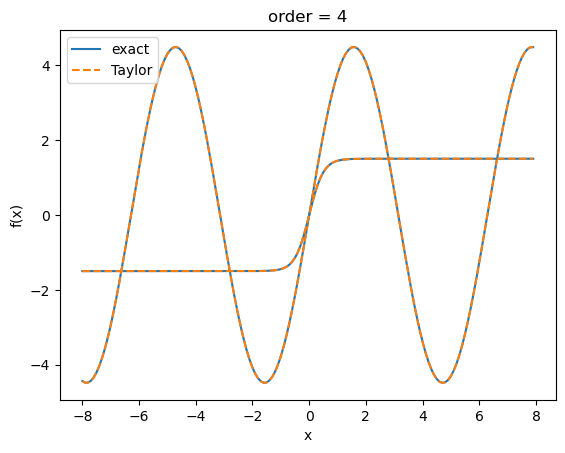

In [15]:
plt.plot(xs, F_exact[0,:], 'C0', label='exact')
plt.plot(xs, F_taylor[0,:],'C1--', label='Taylor')

plt.plot(xs, F_exact[1,:], 'C0')
plt.plot(xs, F_taylor[1,:],'C1--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.title('order = %d'%(order))

## Compare to Linear Approximation

Text(0.5, 1.0, 'order = 1')

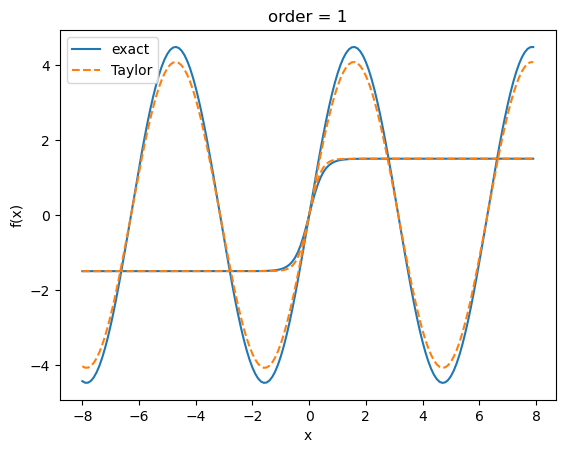

In [16]:
F_taylor = taylor_approximate(p0, params_center, derivs, order=1)

plt.plot(xs, F_exact[0,:], 'C0', label='exact')
plt.plot(xs, F_taylor[0,:],'C1--', label='Taylor')

plt.plot(xs, F_exact[1,:], 'C0')
plt.plot(xs, F_taylor[1,:],'C1--')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.title('order = %d'%(1))